### Melt temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys,os
from pathlib import Path


root_path = os.path.join(Path().resolve().parent.parent)
package_path = os.path.join(root_path, "hamageolib")
test_fixture_path = os.path.join(root_path, "tests", "integration", "fixtures")
result_path = os.path.join(Path().resolve(), "results")

if str(package_path) not in sys.path:
    sys.path.insert(0, str(package_path))

if not os.path.isdir(result_path):
    os.mkdir(result_path)

from core.melt import ROCK_MELTING

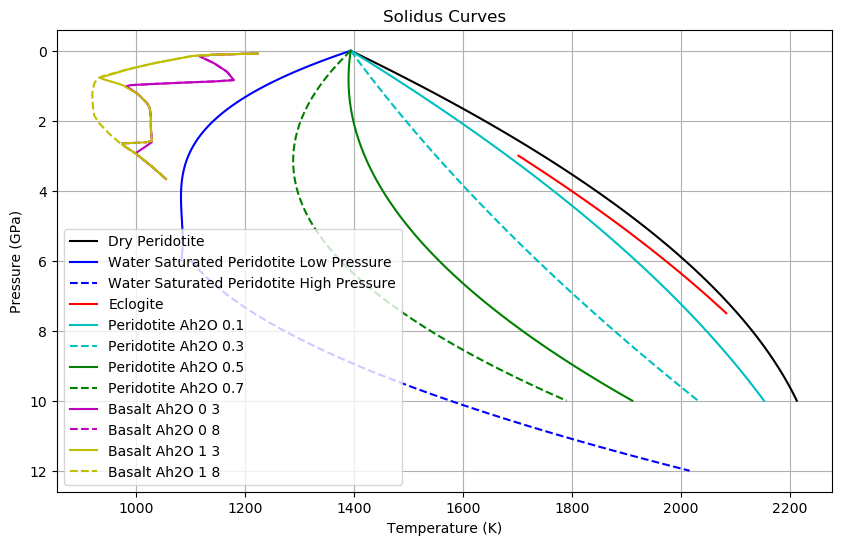

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the ROCK_MELTING instance
rock_melting = ROCK_MELTING()

# Define pressure ranges for each curve in Pascals (Pa)
pressure_ranges = {
    "dry_peridotite": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "water_saturated_peridotite_low_pressure": np.linspace(0, 6e9, 100),  # 0 to 6 GPa
    "water_saturated_peridotite_high_pressure": np.linspace(6e9, 12e9, 100),  # 6 to 12 GPa
    "eclogite": np.linspace(3e9, 7.5e9, 100),  # 3 to 7.5 GPa
    "peridotite_aH2O_0.1": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "peridotite_aH2O_0.3": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "peridotite_aH2O_0.5": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "peridotite_aH2O_0.7": np.linspace(0, 10e9, 100),  # 0 to 10 GPa
    "basalt_aH2O_0_3": np.linspace(0.078e9, 3.665e9, 100),  # 0.078 to 3.665 GPa
    "basalt_aH2O_0_8": np.linspace(0.078e9, 3.665e9, 100),  # 0.078 to 3.665 GPa
    "basalt_aH2O_1_3": np.linspace(0.078e9, 3.665e9, 100),  # 0.078 to 3.665 GPa
    "basalt_aH2O_1_8": np.linspace(0.078e9, 3.665e9, 100),  # 0.078 to 3.665 GPa
}

# Colors and line styles for each curve
styles = {
    "dry_peridotite": ("k", "-"),
    "water_saturated_peridotite_low_pressure": ("b", "-"),
    "water_saturated_peridotite_high_pressure": ("b", "--"),
    "eclogite": ("r", "-"),
    "peridotite_aH2O_0.1": ("c", "-"),
    "peridotite_aH2O_0.3": ("c", "--"),
    "peridotite_aH2O_0.5": ("g", "-"),
    "peridotite_aH2O_0.7": ("g", "--"),
    "basalt_aH2O_0_3": ("m", "-"),
    "basalt_aH2O_0_8": ("m", "--"),
    "basalt_aH2O_1_3": ("y", "-"),
    "basalt_aH2O_1_8": ("y", "--"),
}

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each solidus curve
for name, func in rock_melting.solidus_data.items():
    P_Pa = pressure_ranges[name]  # Pressures in Pa
    T_K = func(P_Pa)  # Temperatures in K
    P_GPa = P_Pa / 1e9  # Convert Pa to GPa for plotting
    color, linestyle = styles[name]
    ax.plot(T_K, P_GPa, color=color, linestyle=linestyle, label=name.replace("_", " ").title())

# Axes formatting
ax.invert_yaxis()  # Reverse y-axis (Pressure increases downward)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Pressure (GPa)")
ax.set_title("Solidus Curves")
ax.legend(loc="best")
ax.grid(True)

# Show plot
plt.show()


add basalt curve